## Understanding How to deal with Imbalanced Dataset

Case Study

In a cancer prediction analysis problem you have a target variable in which their are 2 unique values(Yes/No).

            1.Yes - 100 records(patients having cancer) -> minority class
            2.No  - 900 records(patients not having cancer) -> majority class

* Data is not evenly distributed between the two values clearly we see imbalance distribution of data.

* so **Yes** class is known as **majority class** and **No** class is known as **minority class**.

* The problem here is most of the ML algorithms tends towrds majority class where in such cases like cancer prediction analysis on patients your aim is to focus more on minority class(i.e Yes which has 100 records).

* To handle this imbalance problem in dataset we have several techniques:
    	      1. undersampling
	          2. oversampling
	          3. smote

### Under Sampling

In Under Sampling, we're just reducing the count of data points in majority class by randomly picking 100 data points so that the count of both majority class and minority class are equal and we finally have balanced data ditribution.

Under Sampling technique is generally not recommended because in data science having more data is key but in this case we're drastically reducing the data. 

In [ ]:
# from imblearn.under_sampling import NearMiss

### Over Sampling

In Over Sampling technique, we're just increasing the count of data points(records) in minority class by simple duplication based on the existing data points.

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

### SMOTE(Synthetic Minority Oversampling Technique)

In smote(synthetic minority oversampling technique), we generate data as we do in oversampling but the difference here is we use knn mechanism in smote technique.

We generate data points based on the average of existing neighbor data points synthetically.

Note that we're not duplicating from existing data points we're synthetically creating new data points based on the average of existing neighbors. 

In [ ]:
# from imblearn.over_sampling import SMOTE

### Case Study on Car Evaluation dataset to understand various techniques on how to deal with Imabalanced dataset

### Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the Dataset

In [ ]:
df = pd.read_csv('car_evaluation.csv')

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,outcome
1723,low,low,5,5,med,med,good
1724,low,low,5,5,med,high,vgood
1725,low,low,5,5,big,low,unacc
1726,low,low,5,5,big,med,good
1727,low,low,5,5,big,high,vgood


In [ ]:
df.shape

(1728, 7)

In [ ]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'outcome'], dtype='object')

In [ ]:
df.dtypes

buying      object
maint       object
doors        int64
persons      int64
lug_boot    object
safety      object
outcome     object
dtype: object

In [ ]:
df.describe()

,doors,persons
count,1728.000000,1728.000000
mean,3.500000,3.666667
std,1.118358,1.247580
min,2.000000,2.000000
25%,2.750000,2.000000
50%,3.500000,4.000000
75%,4.250000,5.000000
max,5.000000,5.000000


### Value_counts

In [ ]:
for col in df:
    print(f'{col}: {df[col].unique()}')

buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: [2 3 4 5]
persons: [2 4 5]
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']
outcome: ['unacc' 'acc' 'vgood' 'good']


In [ ]:
for col in list(df):
    print(col, df[col].nunique())

buying 4
maint 4
doors 4
persons 3
lug_boot 3
safety 3
outcome 4


### Checking no. of unique values in Target Variable

In [ ]:
df.outcome.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: outcome, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


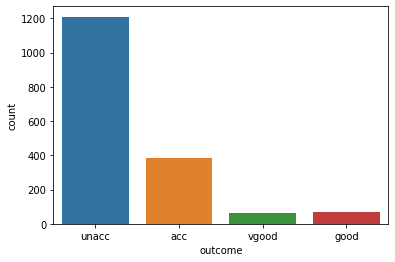

In [ ]:
sns.countplot(df['outcome'])

Clearly we have a case of Imbalanced data in target variable

### Missing Values

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

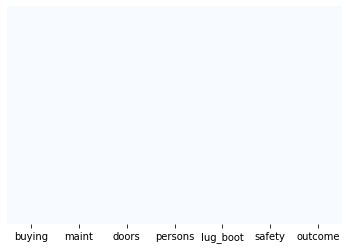

In [ ]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'Blues')

### Duplicated Values

In [ ]:
df.duplicated().sum()

0

### Dividing the dataset based on Independent and Dependent Features

In [ ]:
x = df.iloc[:,:-1]
y = df.outcome

In [ ]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


### Encoding Categorical data into Numerical Data -> Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
x.loc[:,['buying','maint','lug_boot','safety']] = x.loc[:,['buying','maint','lug_boot','safety']].apply(enc.fit_transform)

In [ ]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [ ]:
for col in x:
    print(f'{col}: {x[col].unique()}')

buying: [3 0 2 1]
maint: [3 0 2 1]
doors: [2 3 4 5]
persons: [2 4 5]
lug_boot: [2 1 0]
safety: [1 2 0]


### Splitting the dataset into Train and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

### Applying KNN Classifier Algorithm on the data without treating the Imbalance data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

### Accuracy Score(92.8%)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.928709055876686


### Crosstab(Biased towards Majority Class)

In [ ]:
pd.crosstab(y_test, y_predict)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,89,2,11,0
good,10,10,1,0
unacc,5,0,366,0
vgood,5,2,1,17


In [ ]:
89/102
366/371
10/21
17/25

0.68

### Confusion Matrix and Classification Report

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_predict))
print()
print(classification_report(y_test,y_predict))

[[ 89   2  11   0]
 [ 10  10   1   0]
 [  5   0 366   0]
 [  5   2   1  17]]

              precision    recall  f1-score   support

         acc       0.82      0.87      0.84       102
        good       0.71      0.48      0.57        21
       unacc       0.97      0.99      0.98       371
       vgood       1.00      0.68      0.81        25

    accuracy                           0.93       519
   macro avg       0.87      0.75      0.80       519
weighted avg       0.93      0.93      0.93       519



### Random Forest Classifier Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print()
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[ 99   3   0   0]
 [  3  18   0   0]
 [  0   0 371   0]
 [  1   0   0  24]]

0.9865125240847784

              precision    recall  f1-score   support

         acc       0.96      0.97      0.97       102
        good       0.86      0.86      0.86        21
       unacc       1.00      1.00      1.00       371
       vgood       1.00      0.96      0.98        25

    accuracy                           0.99       519
   macro avg       0.95      0.95      0.95       519
weighted avg       0.99      0.99      0.99       519



In [ ]:
pd.crosstab(y_test, y_pred)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,99,3,0,0
good,3,18,0,0
unacc,0,0,371,0
vgood,1,0,0,24


## Logistic Regression with Hyperparameter Tuning(GridSearchCV)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [ ]:
log = LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [ ]:
logh=GridSearchCV(log,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
logh.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [ ]:
y_pred=logh.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print()
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[ 22   0  75   5]
 [  4   0  17   0]
 [ 33   0 336   2]
 [  9   0  12   4]]

0.697495183044316

              precision    recall  f1-score   support

         acc       0.32      0.22      0.26       102
        good       0.00      0.00      0.00        21
       unacc       0.76      0.91      0.83       371
       vgood       0.36      0.16      0.22        25

    accuracy                           0.70       519
   macro avg       0.36      0.32      0.33       519
weighted avg       0.63      0.70      0.65       519



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pd.crosstab(y_test, y_pred)

col_0,acc,unacc,vgood
outcome,,,
acc,22,75,5
good,4,17,0
unacc,33,336,2
vgood,9,12,4


### Need to install imblearn before applying SMOTE technique on the dataset

In [ ]:
!pip install imblearn

### Applying SMOTE technique on the dataset

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
x_train_smote, y_train_smote = smote.fit_sample(x_train.astype('float'),y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print('Before SMOTE:',Counter(y_train))
print('After SMOTE:',Counter(y_train_smote))

Before SMOTE: Counter({'unacc': 839, 'acc': 282, 'good': 48, 'vgood': 40})
After SMOTE: Counter({'acc': 839, 'unacc': 839, 'vgood': 839, 'good': 839})


### Applying KNN Classifier Algorithm on the data after treating the Imbalance data problem

In [ ]:
model.fit(x_train_smote, y_train_smote)
y_predict = model.predict(x_test)

### Accuracy Score(94.2%)

In [ ]:
print(accuracy_score(y_test,y_predict))

0.9421965317919075


### Crosstab(after smote)

In [ ]:
pd.crosstab(y_test,y_predict)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,92,5,3,2
good,1,20,0,0
unacc,16,1,354,0
vgood,0,2,0,23


### Confusion Matrix and Classification Report

In [ ]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[ 92   5   3   2]
 [  1  20   0   0]
 [ 16   1 354   0]
 [  0   2   0  23]]
              precision    recall  f1-score   support

         acc       0.84      0.90      0.87       102
        good       0.71      0.95      0.82        21
       unacc       0.99      0.95      0.97       371
       vgood       0.92      0.92      0.92        25

    accuracy                           0.94       519
   macro avg       0.87      0.93      0.90       519
weighted avg       0.95      0.94      0.94       519

